In [1]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 5.0 MB/s eta 0:00:00


In [2]:
import praw
user_agent = "Scarper 1.0 by /u/Sage_ravenA"
reddit = praw.Reddit(
    client_id="up-zzc3CglBizmg3ad6inQ",
    client_secret="rf4HjcE6qYEP1-10V_7U2S_9jMPfLQ",
    user_agent=user_agent
)

In [20]:
# hot new rising top
headlines=set()
for submission in reddit.subreddit('politics').hot(limit=None):
  headlines.add(submission.title)
print(len(headlines))  

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

751


In [21]:
import pandas as pd
df = pd.DataFrame(headlines)
df.head()

,0
0,Justice Thomas reportedly took undisclosed lux...
1,"Ireland Readies a Warm Welcome for Biden, ‘the..."
2,Trump ally Jordan issues subpoena to former N....
3,Tenure of new Michigan GOP chair who spread Be...
4,DeSantis’ bewildering fixation on responsible ...


In [22]:
df.to_csv('headlines.csv', header=False, encoding= 'utf_8', index = False)

In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint 
sia = SIA()
results = []

for line in headlines:
  pol_score = sia.polarity_scores(line) # -> dict
  pol_score['headline'] = line
  results.append(pol_score)

pprint(results[:3], width=100)  

[{'compound': 0.5267,
  'headline': 'Justice Thomas reportedly took undisclosed luxury trips',
  'neg': 0.0,
  'neu': 0.638,
  'pos': 0.362},
 {'compound': 0.5994,
  'headline': 'Ireland Readies a Warm Welcome for Biden, ‘the Most Irish’ President Since J.F.K.',
  'neg': 0.0,
  'neu': 0.671,
  'pos': 0.329},
 {'compound': 0.0,
  'headline': 'Trump ally Jordan issues subpoena to former N.Y. prosecutor',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [30]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,0.638,0.362,0.5267,Justice Thomas reportedly took undisclosed lux...
1,0.000,0.671,0.329,0.5994,"Ireland Readies a Warm Welcome for Biden, ‘the..."
2,0.000,1.000,0.000,0.0000,Trump ally Jordan issues subpoena to former N....
3,0.175,0.825,0.000,-0.5267,Tenure of new Michigan GOP chair who spread Be...
4,0.000,0.796,0.204,0.3182,DeSantis’ bewildering fixation on responsible ...


In [31]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.638,0.362,0.5267,Justice Thomas reportedly took undisclosed lux...,1
1,0.000,0.671,0.329,0.5994,"Ireland Readies a Warm Welcome for Biden, ‘the...",1
2,0.000,1.000,0.000,0.0000,Trump ally Jordan issues subpoena to former N....,0
3,0.175,0.825,0.000,-0.5267,Tenure of new Michigan GOP chair who spread Be...,-1
4,0.000,0.796,0.204,0.3182,DeSantis’ bewildering fixation on responsible ...,1


In [32]:
df2 = df[['headline', 'label']]


In [34]:
df.to_csv('reddit_headlines_labels.csv', encoding='utf=8', index=False)

In [35]:
df.label.value_counts()

-1    305
 0    270
 1    176
Name: label, dtype: int64

In [36]:
df.label.value_counts(normalize=True) * 100

-1    40.612517
 0    35.952064
 1    23.435419
Name: label, dtype: float64

In [50]:
from pprint import pprint
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines: \n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Justice Thomas reportedly took undisclosed luxury trips',
 'Ireland Readies a Warm Welcome for Biden, ‘the Most Irish’ President Since J.F.K.',
 'DeSantis’ bewildering fixation on responsible investing will cost Florida billions',
 'Supreme Court says transgender girl can run track in West Virginia as lawsuit proceeds',
 'North Carolina Lawmaker Switches Parties, Gives Republicans Unlimited Power']

Negative headlines: 

['Tenure of new Michigan GOP chair who spread Beyoncé paganism conspiracy theory is off to a rocky start',
 'Defeated Right-Wing Judge Refuses to Concede to Victor He Deems Not \'Worthy\' | "This is just what Republicans do now," said one critic.',
 'Complaint alleges Rep. Bryan Slaton had “inappropriate relationship” with an intern',
 'Fascism’s History Offers Lessons about Today’s Attacks on Education | Moves in Florida to control public education mirror past fascist strategies in ways that are disquieting for American '
 'democracy, a historia

<Axes: ylabel='label'>

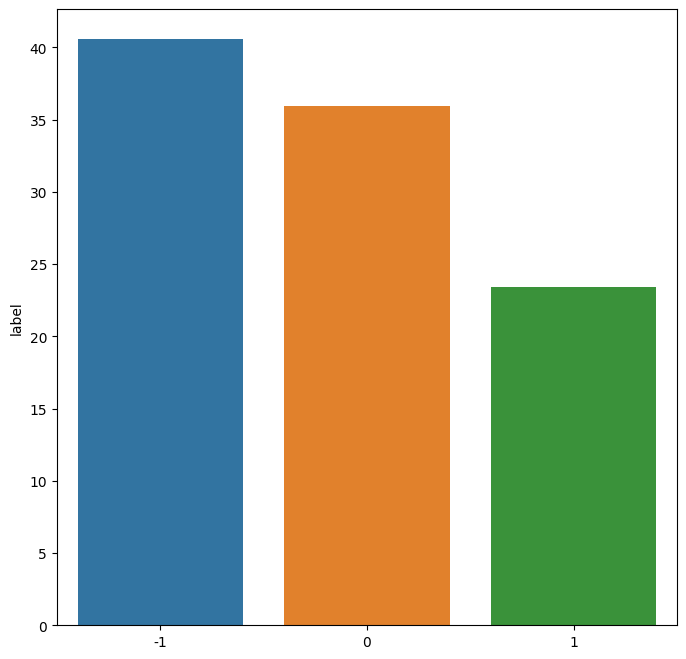

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)
